# Tarea 2: Ecuaciones no lineales
### David Felipe Mora - Ciencias de la computación
---

Algunas librerias que vamos a usar:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


## Problemas

### Problema 1. (Kelley)
Considere el método de Shamanskii de orden $m$ definido de la siguiente manera. Dado $x_n$ calcule $x_{n+1}$ usando $m$ pasos del método de la cuerda, esto es, 

$z_1=x_n-f(x_n)/f'(x_n)$

$z_{j+1}=z_{j}-f(z_j)/f'(x_n)$, $1\leq j\leq m-1$

$x_{n+1}=z_{m}$.

Observe que se avanza m pasos sin actualizar la derivada en el punto. Implemente el método para un order $m$ definido por el usuario y verifique su código con una ecuación escalar. 

In [2]:
def shamanskii(f, fp, x0, epsilon, delta, max_iter, order):
    """
    f(x)=0 usando el metodo de shamanskii
    ----------
    f : funnción
    fp : Derivada
    x0 : Aproximación inicial
    epsilon : Tolerancia residuo.
    delta : Tolerancia incremento.
    max_iter : Número maximo de iteraciones
    order : orden del metodo de Shamanskii
    ----------
    """
    approximations = [x0]
    for n in range(max_iter):
        fx = f(x0)

        if abs(fx) < epsilon:
            print("Reached epsilon limit.")
            return approximations

        fpx = fp(x0)
        if fpx == 0:
            print("Null derivative. Error!")
            return approximations

        z0 = x0 - fx / fpx
        for i in range(order - 1):  # m iteraciones intermedias
            z1 = z0 - f(z0) / fpx
            z0 = z1
        x1 = z0
        approximations.append(x1)

        if abs(x0 - x1) < delta:
            print("Reached delta limit")
            return approximations
        x0 = x1

    print("Maximum iteration reached.")
    return approximations


Vamos a resolver la ecuación escalar: $$e^x - \sin x = 0$$

In [3]:
f = lambda x: np.exp(x) - np.sin(x)
f_prime = lambda x: np.exp(x) - np.cos(x)

root = shamanskii(f, f_prime, 1, 10e-15, 10e-15, 5, 5)[-1]
root


Reached epsilon limit.


-3.1830630119333634

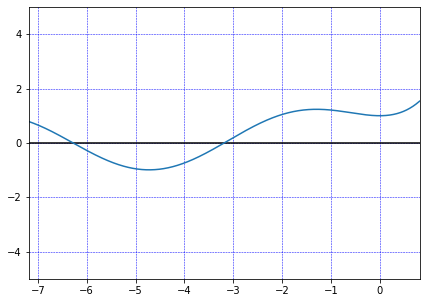

In [4]:
x_val = np.linspace(root - 4, root + 4, 1000)
f_val = f(x_val)

plt.figure(figsize=(7, 5))
plt.grid(color="b", linestyle="--", linewidth=0.5)
plt.plot(x_val, 0 * x_val, "k")
plt.plot(x_val, f_val)
plt.xlim([root - 4, root + 4])
plt.ylim(-5, 5)

plt.show()


Mediante la grafica podemos comprobar que el metodo converge correctamente a una raiz en $x \approx -3.18$

### Problema 2. (Kelley, Iterative methodos for linear and non linear equations)
Resuelva las siguientes ecuaiones $f(x)=0$ usando el Método de newton, el método de la secante (para este inicie la iteración en $x_{-1}$ con $x_{-1}=0.99x_0$) y el método de Shamanskii con $m=2,3,4$. Comente los resultados. Puede hacer tablas o plots con las iteraciones.


1.   $f(x)=\cos(x)-x$,  $\quad x_0=.5$.
2.   $f(x)=\arctan(x)$,  $\quad x_0=1$.
3.   $f(x)=\sin(x)$, $\quad  x_0=3$.
4.   $f(x)=x^2$,  $\quad  x_0=.5$.
5.   $f(x)=x^2+1$,  $\quad  x_0=10$.

Para visualizar mejor los resultados de los metodos, vamos a mostrar las tablas de las iteraciones y tambien vamos a graficarlas, para ello vamos a usar la siguiente función:

In [5]:
def plot_fun(f, approximations):
    root = approximations[-1]
    x_val = np.linspace(root - 4, root + 4, 1000)
    f_val = f(x_val)

    plt.figure(figsize=(7, 5))
    plt.grid(color="b", linestyle="--", linewidth=0.5)
    plt.plot(approximations, f(approximations), "ro", markersize=4)
    plt.plot(x_val, 0 * x_val, "k")

    plt.plot(x_val, f_val)
    plt.xlim([root - 4, root + 4])
    plt.ylim(-5, 5)
    plt.show()


Antes que nada vamos a definir los algoritmos para el metodo de Newton y el metodo de la secante. Estos algoritmos han sido escritos de tal forma que retornen todas las aproximaciones.

In [6]:
def newton(f, fp, x0, epsilon, delta, max_iter):
    """
    f(x)=0 usando el metodo de newton
    ----------
    f : función
    fp : Derivada
    x0 : Aproximación inicial
    epsilon : Tolerancia residuo.
    delta : Tolerancia incremento.
    max_iter : Número maximo de iteraciones
    ----------
    """
    approximations = [x0]
    for n in range(max_iter):
        fx = f(x0)

        if abs(fx) < epsilon:
            print("Reached epsilon limit.")
            return approximations

        fpx = fp(x0)
        if fpx == 0:
            print("Null derivative. Error!")
            return approximations

        x1 = x0 - fx / fpx
        approximations.append(x1)

        if abs(x0 - x1) < delta:
            print("Reached delta limit")
            return approximations
        x0 = x1

    print("Maximum iteration reached.")
    return approximations


In [7]:
def secante(f, x0, epsilon, delta, max_iter):
    """
    f(x)=0 usando el metodo de la secante
    ----------
    f : función
    x0 : Aproximación inicial
    epsilon : Tolerancia residuo.
    delta : Tolerancia incremento.
    max_iter : Número maximo de iteraciones
    ----------
    """
    x0, x1 = x0 * 0.99, x0
    approximations = [x0, x1]
    for n in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)

        if abs(fx1) < epsilon:
            print("Reached epsilon limit.")
            return approximations

        if fx1 == fx0:
            print("Error. Division por cero.")

        s = (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x1 - fx1 * s
        approximations.append(x1)

        if abs(x0 - x1) < delta:
            print("Reached delta limit.")
            return approximations

    print("Maximum iteration reached.")
    return approximations


Ahora bien, definimos las funciones, sus derivadas y los valores de x0. Tambien definimos los valores de epsilon y delta:

In [8]:
fs = [
    lambda x: np.cos(x) - x,
    lambda x: np.arctan(x),
    lambda x: np.sin(x),
    lambda x: np.power(x, 2),
    lambda x: np.power(x, 2) + 1,
]
fps = [
    lambda x: -np.sin(x) - 1,
    lambda x: 1 / (np.power(x, 2) + 1),
    lambda x: np.cos(x),
    lambda x: 2 * x,
    lambda x: 2 * x,
]
x0s = [0.5, 1, 3, 0.5, 10]

epsilon, delta = 10e-15, 10e-15


Usando el metodo de Newton obtenemos:

f1 = 0 usando Newton
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,0.500000,3.775826e-01
1,0.755222,-2.710331e-02
2,0.739142,-9.461538e-05
3,0.739085,-1.180978e-09
4,0.739085,0.000000e+00


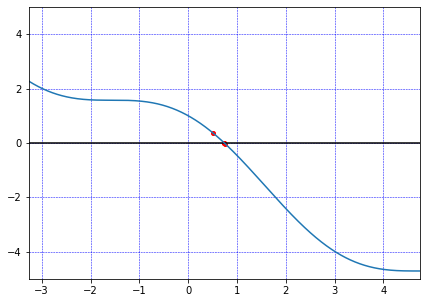

f2 = 0 usando Newton
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,1.000000e+00,7.853982e-01
1,-5.707963e-01,-5.186694e-01
2,1.168599e-01,1.163323e-01
3,-1.061022e-03,-1.061022e-03
4,7.963096e-10,7.963096e-10
5,0.000000e+00,0.000000e+00


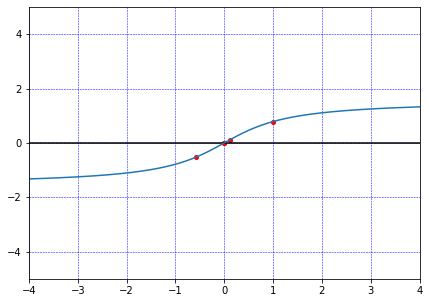

f3 = 0 usando Newton
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,3.000000,1.411200e-01
1,3.142547,-9.538893e-04
2,3.141593,2.893162e-10
3,3.141593,1.224647e-16


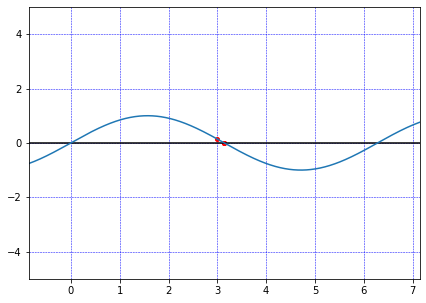

f4 = 0 usando Newton
Maximum iteration reached.


,x_n,f(x_n)
n,,
0,0.500000,2.500000e-01
1,0.250000,6.250000e-02
2,0.125000,1.562500e-02
3,0.062500,3.906250e-03
4,0.031250,9.765625e-04
5,0.015625,2.441406e-04
6,0.007812,6.103516e-05
7,0.003906,1.525879e-05
8,0.001953,3.814697e-06


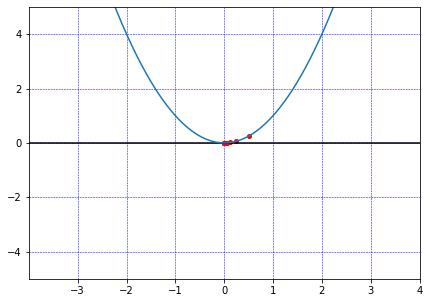

f5 = 0 usando Newton
Maximum iteration reached.


,x_n,f(x_n)
n,,
0,10.000000,101.000000
1,4.950000,25.502500
2,2.373990,6.635828
3,0.976379,1.953316
4,-0.023907,1.000572
5,20.902715,437.923513
6,10.427437,109.731450
7,5.165768,27.685162
8,2.486093,7.180659


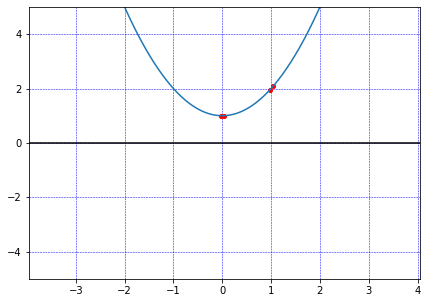

In [9]:
for idx, (f, fp, x0) in enumerate(zip(fs, fps, x0s)):
    print(f"f{idx+1} = 0 usando Newton")
    newton_values = newton(f, fp, x0, epsilon, delta, 10)
    display(
        pd.DataFrame({"x_n": newton_values, "f(x_n)": f(newton_values)}).rename_axis(
            "n"
        )
    )
    plot_fun(f, newton_values)


En general podemos observar que para las primeras tres funciones el metodo converge rapidamente, sin embargo para $f(x) = x^2$ no llega a alcanzar ninguno de los criterios de parada y termina por exceder el numero máximo de iteraciones. Para $f(x) = x^2 + 1$ claramente diverge y se detiene al exceder el numero máximo de iteraciones, no obstante las aproximaciones se acercan al minimo de la función.

Usando el metodo de Shamanskii con $m = 2$:

f1 = 0 usando shamanskii con m = 2
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,0.500000,3.775826e-01
1,0.736902,3.651525e-03
2,0.739085,1.705065e-09
3,0.739085,0.000000e+00


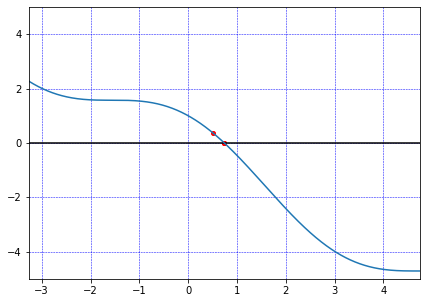

f2 = 0 usando shamanskii con m = 2
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,1.000000e+00,7.853982e-01
1,4.665424e-01,4.365251e-01
2,1.403632e-02,1.403539e-02
3,3.632095e-10,3.632095e-10
4,0.000000e+00,0.000000e+00


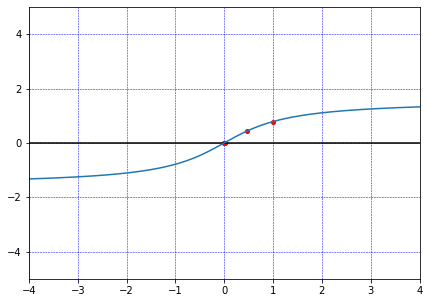

f3 = 0 usando shamanskii con m = 2
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,3.000000,1.411200e-01
1,3.141583,9.642404e-06
2,3.141593,1.224647e-16


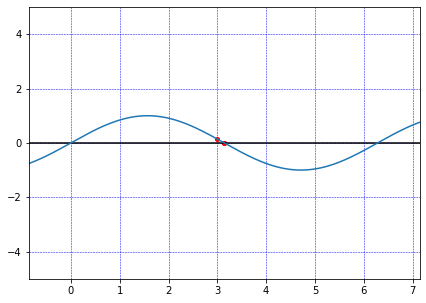

f4 = 0 usando shamanskii con m = 2
Maximum iteration reached.


,x_n,f(x_n)
n,,
0,0.500000,2.500000e-01
1,0.187500,3.515625e-02
2,0.070312,4.943848e-03
3,0.026367,6.952286e-04
4,0.009888,9.776652e-05
5,0.003708,1.374842e-05
6,0.001390,1.933371e-06
7,0.000521,2.718803e-07
8,0.000196,3.823317e-08


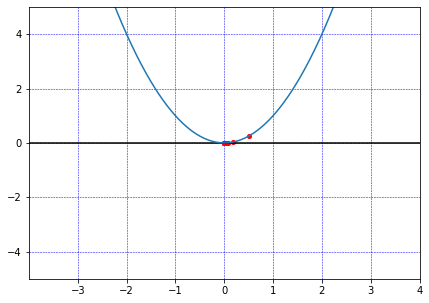

f5 = 0 usando shamanskii con m = 2
Maximum iteration reached.


,x_n,f(x_n)
n,,
0,10.000000,101.000000
1,3.674875,14.504706
2,1.171471,2.372344
3,-0.278672,1.077658
4,8.362873,70.937648
5,3.046182,10.279223
6,0.891686,1.795104
7,-0.683030,1.466530
8,1.234188,2.523219


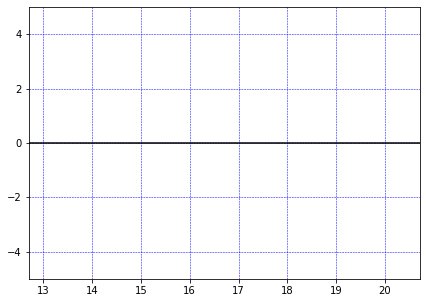

In [10]:
for idx, (f, fp, x0) in enumerate(zip(fs, fps, x0s)):
    print(f"f{idx+1} = 0 usando shamanskii con m = 2")
    shamanskii_values = shamanskii(f, fp, x0, epsilon, delta, 10, 2)
    display(
        pd.DataFrame(
            {"x_n": shamanskii_values, "f(x_n)": f(shamanskii_values)}
        ).rename_axis("n")
    )
    plot_fun(f, shamanskii_values)


Para el metodo de Shamanskii con $m = 2$ vemos que los resultados son muy similares a Newton, quizas un poco mas imprecisos. Tambien podemos ver que para la ultima función las aproximaciones empiezan a tomar valores muy grandes.

Usando el metodo de Shamanskii con $m = 3$:

f1 = 0 usando shamanskii con m = 3
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,0.500000,3.775826e-01
1,0.739370,-4.775601e-04
2,0.739085,-5.551115e-16


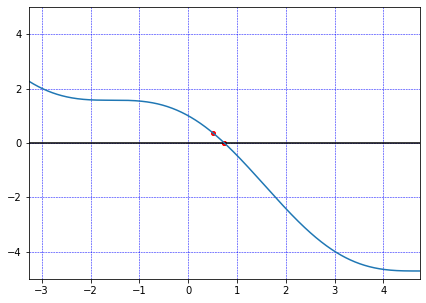

f2 = 0 usando shamanskii con m = 3
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,1.000000e+00,7.853982e-01
1,-4.065078e-01,-3.861040e-01
2,1.179726e-03,1.179726e-03
3,-2.120203e-21,-2.120203e-21


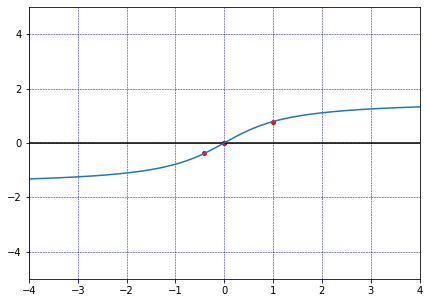

f3 = 0 usando shamanskii con m = 3
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,3.000000,1.411200e-01
1,3.141593,-9.747184e-08
2,3.141593,1.224647e-16


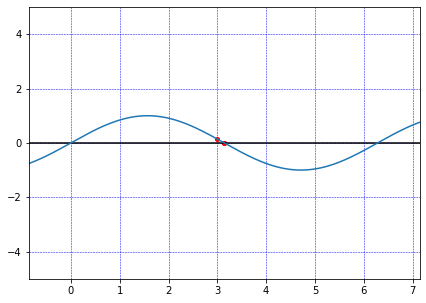

f4 = 0 usando shamanskii con m = 3
Maximum iteration reached.


,x_n,f(x_n)
n,,
0,0.500000,2.500000e-01
1,0.152344,2.320862e-02
2,0.046417,2.154560e-03
3,0.014143,2.000174e-04
4,0.004309,1.856851e-05
5,0.001313,1.723798e-06
6,0.000400,1.600279e-07
7,0.000122,1.485610e-08
8,0.000037,1.379159e-09


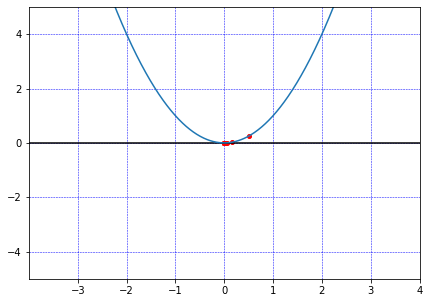

f5 = 0 usando shamanskii con m = 3
Maximum iteration reached.


,x_n,f(x_n)
n,,
0,10.000000,1.010000e+02
1,2.949640,9.700374e+00
2,0.555861,1.308981e+00
3,-5.908924,3.591538e+01
4,-1.634673,3.672157e+00
5,0.185116,1.034268e+00
6,-1541.851273,2.377306e+06
7,-469.782181,2.206963e+05
8,-143.134696,2.048854e+04


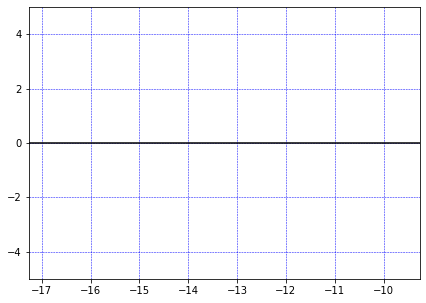

In [11]:
for idx, (f, fp, x0) in enumerate(zip(fs, fps, x0s)):
    print(f"f{idx+1} = 0 usando shamanskii con m = 3")
    shamanskii_values = shamanskii(f, fp, x0, epsilon, delta, 10, 3)
    display(
        pd.DataFrame(
            {"x_n": shamanskii_values, "f(x_n)": f(shamanskii_values)}
        ).rename_axis("n")
    )
    plot_fun(f, shamanskii_values)


Usando el metodo de Shamanskii con $m = 4$:

f1 = 0 usando shamanskii con m = 4
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,0.500000,0.377583
1,0.739048,0.000063
2,0.739085,0.000000


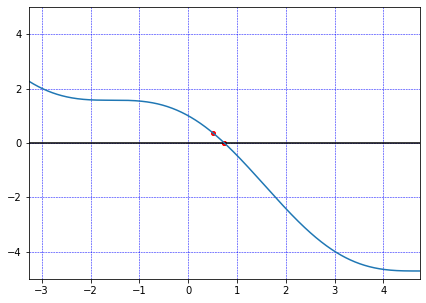

f2 = 0 usando shamanskii con m = 4
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,1.000000e+00,7.853982e-01
1,3.657001e-01,3.505925e-01
2,7.579381e-05,7.579381e-05
3,5.503164e-38,5.503164e-38


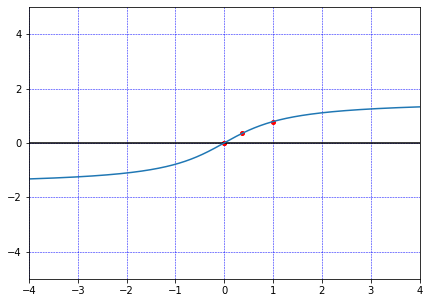

f3 = 0 usando shamanskii con m = 4
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,3.000000,1.411200e-01
1,3.141593,9.853102e-10
2,3.141593,1.224647e-16


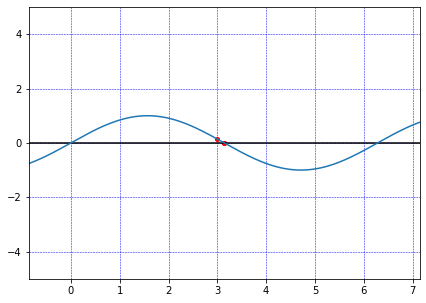

f4 = 0 usando shamanskii con m = 4
Maximum iteration reached.


,x_n,f(x_n)
n,,
0,5.000000e-01,2.500000e-01
1,1.291351e-01,1.667588e-02
2,3.335176e-02,1.112340e-03
3,8.613769e-03,7.419702e-05
4,2.224680e-03,4.949203e-06
5,5.745688e-04,3.301293e-07
6,1.483940e-04,2.202079e-08
7,3.832577e-05,1.468864e-09
8,9.898406e-06,9.797844e-11


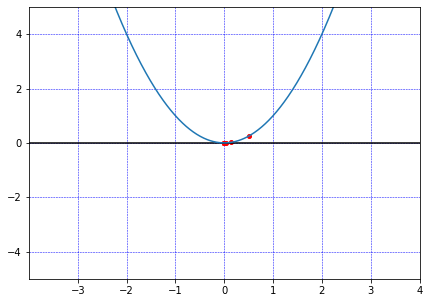

f5 = 0 usando shamanskii con m = 4
Maximum iteration reached.


,x_n,f(x_n)
n,,
0,1.000000e+01,1.010000e+02
1,2.464621e+00,7.074357e+00
2,1.074832e-01,1.011553e+00
3,-1.355268e+10,1.836752e+20
4,-3.500255e+09,1.225179e+19
5,-9.040118e+08,8.172373e+17
6,-2.334794e+08,5.451261e+16
7,-6.030078e+07,3.636184e+15
8,-1.557390e+07,2.425463e+14


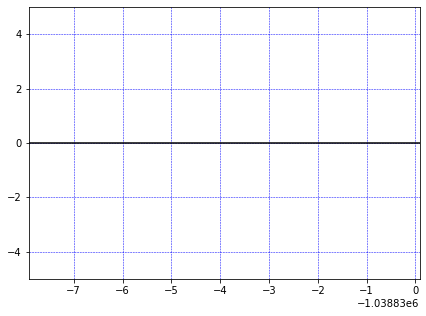

In [12]:
for idx, (f, fp, x0) in enumerate(zip(fs, fps, x0s)):
    print(f"f{idx+1} = 0 usando shamanskii con m = 4")
    shamanskii_values = shamanskii(f, fp, x0, epsilon, delta, 10, 4)
    display(
        pd.DataFrame(
            {"x_n": shamanskii_values, "f(x_n)": f(shamanskii_values)}
        ).rename_axis("n")
    )
    plot_fun(f, shamanskii_values)


Los resultados del metodo de Shamanskii para $m=3$ y $m=4$ son muy similares a los anteriores, sin embargo podemos identificar algunas diferencias, por ejemplo, para la función $f(x) = x^2$ estamos obteniendo resultados un poco mas precisos, y la funcion $f(x) = x^2 + 1$ obtenemos aproximaciones cada vez mas grandes en magnitud.

Usando el metodo de la secante:

f1 = 0 usando el metodo de la secante
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,0.495000,3.849687e-01
1,0.500000,3.775826e-01
2,0.755602,-2.774282e-02
3,0.738107,1.636756e-03
4,0.739082,5.921959e-06
5,0.739085,-1.279741e-09
6,0.739085,8.881784e-16


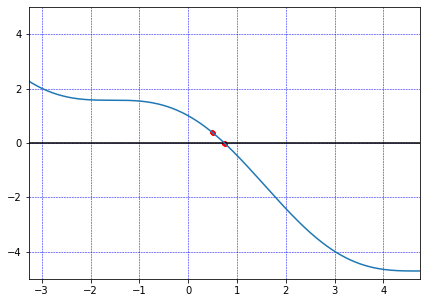

f2 = 0 usando el metodo de la secante
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,9.900000e-01,7.803731e-01
1,1.000000e+00,7.853982e-01
2,-5.629555e-01,-5.127354e-01
3,5.437899e-02,5.432549e-02
4,-4.762798e-03,-4.762762e-03
5,4.279700e-06,4.279700e-06
6,-3.233131e-11,-3.233131e-11
7,1.973860e-22,1.973860e-22


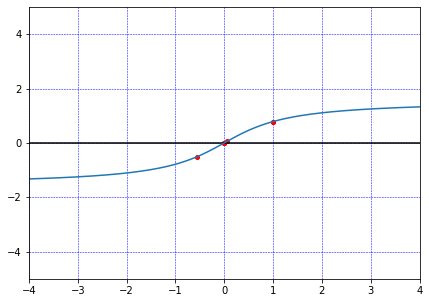

f3 = 0 usando el metodo de la secante
Reached epsilon limit.


,x_n,f(x_n)
n,,
0,2.970000,1.707518e-01
1,3.000000,1.411200e-01
2,3.142873,-1.280788e-03
3,3.141588,4.250744e-06
4,3.141593,-1.158506e-12
5,3.141593,1.224647e-16


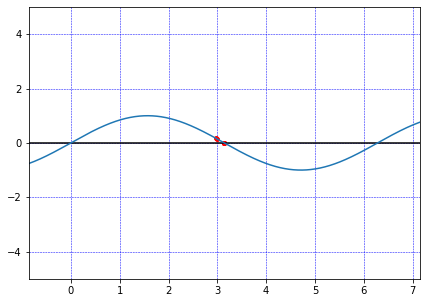

f4 = 0 usando el metodo de la secante
Maximum iteration reached.


,x_n,f(x_n)
n,,
0,0.495000,0.245025
1,0.500000,0.250000
2,0.248744,0.061873
3,0.166107,0.027592
4,0.099598,0.009920
5,0.062264,0.003877
6,0.038313,0.001468
7,0.023718,0.000563
8,0.014649,0.000215


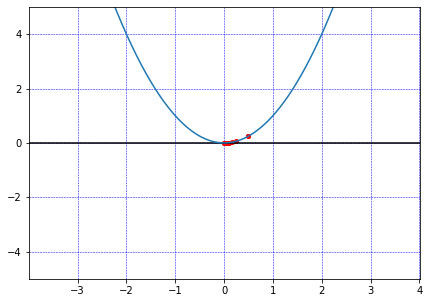

f5 = 0 usando el metodo de la secante
Maximum iteration reached.


,x_n,f(x_n)
n,,
0,9.900000,99.010000
1,10.000000,101.000000
2,4.924623,25.251913
3,3.232660,11.450090
4,1.828995,4.345224
5,0.970536,1.941941
6,0.276870,1.076657
7,-0.586247,1.343685
8,3.756954,15.114702


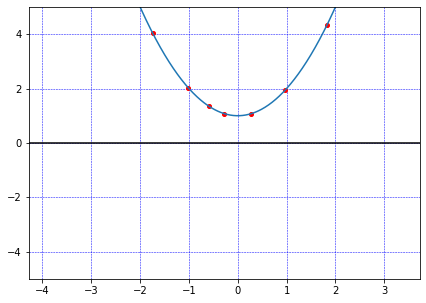

In [13]:
for idx, (f, fp, x0) in enumerate(zip(fs, fps, x0s)):
    print(f"f{idx+1} = 0 usando el metodo de la secante")
    secante_values = secante(f, x0, epsilon, delta, 10)
    display(
        pd.DataFrame({"x_n": secante_values, "f(x_n)": f(secante_values)}).rename_axis(
            "n"
        )
    )
    plot_fun(f, secante_values)


El metodo de la secante obtuvo resultados similares a Newton, pero con menos precision, en la funcion $f(x) = x^2$ podemos ver que tenemos muy pocos digitos correctos, por lo que la velocidad de convergencia es claramente menor a Newton.

### Problema 3. (Quarteroni, Saleri, Gervasio)
Considere un plano cuya pendiente varía con tasa constante $\omega$ y un punto de masa quieto en el tiempo $t=0$. En el tiempo $t>0$ su posición es dada por
$$s(t,\omega)= \frac{g}{2\omega^2}\Big[ \sinh(\omega t)-\sin(\omega t) \Big] $$
donde $g=9.8 \frac{m}{s^2}$. Suponga que el objeto se ha movido 1 metro en un segundo, calcule el valor correspondiente de $\omega$ con 12 decimales exactos. 

**Solución**

Remplazando los datos obtenemos la siguiente ecuación:
$$0 = \frac{g}{2\omega^2}\Big[ \sinh(\omega)-\sin(\omega) \Big] - 1$$
A continuación planteamos la función y hallamos una raiz mediante el metodo de la secante, empezando endo en el punto $x_1 = 5$ y tomando $x_0 = 5 \cdot 0.99$. Ademas tomamos a epsilon y delta como 1e-13 con el fin de tener aproximadamente 12 decimales exactos.

In [14]:
g = 9.8
f = lambda w: g / (2 * np.power(w, 2)) * (np.sinh(w) - np.sin(w)) - 1

secante(f, 5, 1e-13, 1e-13, 15)


Reached epsilon limit.


[4.95,
 5,
 3.3732816388284848,
 2.3276544632521645,
 1.0686568404195973,
 0.637948228169016,
 0.6122107546218392,
 0.6121425757110833,
 0.6121425707030951]

El metodo concluyo debido a que se cumplio el criterio del epsilon, por lo tanto podemos estar seguros que $f(x_n) < 10^{-12}$. Por lo tanto la constante $w = 0.612142570703$.

### Problema 4. (Quarteroni, Saleri, Gervasio) 
La longitud maxima de una varilla que se puede arrastrar de un extremo a otro deslizandola por un pasillo como el de la figura es 
$$L=\frac{l_2}{\sin(\pi-\gamma-\alpha)}+\frac{l_1}{\sin(\alpha)}$$
donde $\alpha$ es la solución de la ecuación
$$ l_2 \frac{\cos(\pi-\gamma-\alpha)}{\sin^2(\pi-\gamma-\alpha)}-l_1\frac{\cos(\alpha)}{\sin^2(\alpha)}=0.$$
Calcule $\alpha$ cuando $l_2=10$, $l_1=8$ y $\gamma=\frac{3\pi}{5}$. ¿Cuántos decimales puede garantizar para $\alpha$ y $L$?

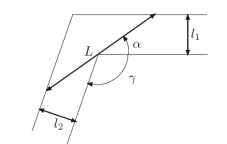

Primero vamos a hallar el vamos de $\alpha$, para ello vamos a usar el metodo de la secante que fue implementado anteriormente, ya que la derivada de la función de $\alpha$ no parece poder ser calculada trivialmente. Incialmente tomamos los puntos $x_0 = 0.99, x_1 = 1$ y obtenemos lo siguiente:

In [15]:
gamma = 3 * np.pi / 5
l2 = 10
l1 = 8
f_alpha = lambda alpha: l2 * np.cos(np.pi - gamma - alpha) / np.power(
    np.sin(np.pi - gamma - alpha), 2
) - l1 * np.cos(alpha) / np.power(np.sin(alpha), 2)

secante(f_alpha, 1, 1e-16, 1e-16, 30)


Reached delta limit.


[0.99,
 1,
 0.873153226264636,
 0.7888681116393422,
 0.677659317289854,
 0.6123344447005424,
 0.5966270670253618,
 0.5962791575907744,
 0.5962799275239845,
 0.5962799274654735,
 0.5962799274654734,
 0.5962799274654735,
 0.5962799274654735]

Podemos ver que la raiz calculada es $0.5962799274654735$. Vamos a repetir el metodo de la secante, esta vez iniciando en $x_0 = 0.6 \cdot 0.99, x_1 = 0.6$ para ver si los resultados son distintos.

In [16]:
secante(f_alpha, 0.6, 1e-16, 1e-16, 30)


Reached delta limit.


[0.594,
 0.6,
 0.5962817377550756,
 0.5962799261054281,
 0.596279927465474,
 0.5962799274654734,
 0.5962799274654735,
 0.5962799274654735]

El metodo concluyo debido a que se alcanzo el limite de error de la aproximacion, por lo que podemos estar seguros que $\alpha = 0.5962799274654735$ ha sido calculado con aproximadamente 15 digitos correctos.

In [17]:
alpha = secante(f_alpha, 0.6, 1e-16, 1e-16, 30)[-1]


Reached delta limit.


Ahora procedemos a calcular la longitud maxima $L$, usando el metodo de la secante:

In [18]:
f_L = lambda L: 10 / np.sin(np.pi - gamma - alpha) + 8 / np.sin(alpha) - L

secante(f_L, 1, 1e-16, 1e-16, 30)


Reached epsilon limit.


[0.99, 1, 30.548423069368926, 30.54842306937352]

El metodo converge muy rapido, por lo que podemos estar seguros que tenemos una precision bastante alta, en este caso tenemos aproximadamente 14 digitos correctos. Por lo tanto la longitud maxima de la varilla es de $30.54842306937352$ aproximadamente.

### Problema 5. 
Selecciones dos de los métodos en https://docs.scipy.org/doc/scipy-0.13.0/reference/optimize.html en la sección Root finding, diga cual es el método numerico implementado (e.g, similar a newton, usa derivadas, no usa derivadas, combina varios métodos, llama alguna otra subrutina conocida encontrada en netlib, cuales son las toleracias por defecto, etc)  y para cada uno de los métodos seleccionados implementar un ejemplo numérico con una ecuación escalar o una ecuación vectorial según sea el caso. Imprima la solución calculada asi como alguna informacion adicional (residuo, cantidad de iteraciones, etc). 

Si usa MatLab seleccione dos de entre los métodos como fsolve, froot, fzero, roots, o similares (https://la.mathworks.com/help/optim/systems-of-nonlinear-equations.html). Análogamente para octave (https://octave.org/doc/v4.2.0/Solvers.html), julia, etc.

[**`scipy.optimize.brentq`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq)

Utiliza el algoritmo conocido como _Brent's method_(Metodo de Brent), el cual es un algoritmo para encontrar las raices de una función escalar real continua que combina el metodo de la bisección, el metodo de la secante e interpolación cuadratica inversa. Este metodo no utiliza derivadas pero necesita de un intervalo inicial con cambio de signo como parametro. Asimismo, tiene una convergencia de orden lineal garantizada y posiblemente de orden $\approx 1.8$ debido a la inverpolación cuadrativa inversa. Por defecto usa una tolerancia de 8.881784197001252e-16. 
Esta función al parece usa una subrutina escrita en [C](https://docs.scipy.org/doc/scipy/reference/optimize.cython_optimize.html#module-scipy.optimize.cython_optimize).

Ejemplo:

Vamos a resolver la ecuación $\cos(x) - x = 0$ la cual sabemos por el ejercicio dos que tiene una raiz en 0.73 aproximadamente, por lo tanto vamos a tomar el intervalo inicial $(0, 2)$.

In [19]:
from scipy.optimize import brentq


f = lambda x: np.cos(x) - x
brentq(f, 0, 2, full_output=True)


(0.7390851332151607,
       converged: True
            flag: 'converged'
  function_calls: 8
      iterations: 7
            root: 0.7390851332151607)

En la informacion adicional proporcionada se puede ver que la raiz calculada es 0.7390851332151607, se corrieron 7 iteraciones del algoritmo y 8 llamadas a la función.

**`scipy.optimize.ridder`**

Utiliza el algoritmo conocido como _Ridders' method_(Metodo de Ridders), el cual es un algoritmo para calcular las raices de una función real escalar continua que esta basado en el metodo de la regla falsa, que a su vez combina el metodo de bisección y el metodo de la secante, y usa la exponencial para aproximar sucesivamenete la raiz de la función. Este metodo no usa derivadas y usa una tolerancia por defecto de 8.881784197001252e-16. Es mas rapido que el metodo de la bisección pero en general mas lento que el metodo de Brent. En su implementacion parece que usa una subrutina escrita en [C](https://docs.scipy.org/doc/scipy/reference/optimize.cython_optimize.html#module-scipy.optimize.cython_optimize).


Ejemplo:
Vamos a resolver la ecuación escalar $x^5 + e^x = 0$, la función graficamente se ve asi:

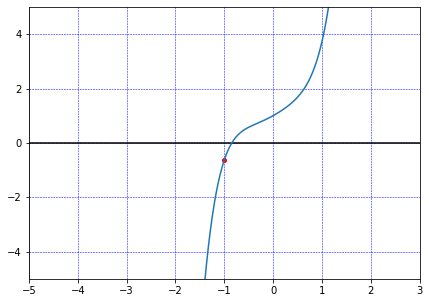

In [20]:
f = lambda x: np.power(x, 5) + np.exp(x)
plot_fun(f, [-1])


Por lo tanto, sabemos que tiene una raiz cerca de -1. Ahora, usando el metodo re Ridders:

In [21]:
from scipy.optimize import ridder


ridder(f, -2, 0, full_output=True)


(-0.8445798674965475,
       converged: True
            flag: 'converged'
  function_calls: 14
      iterations: 6
            root: -0.8445798674965475)

Efectivamente la raiz calculada mediante el metodo de Ridders es -0.8445798674965475, se usaron 6 iteaciones del algoritmo y se llamó a la función un total de 14 veces.